In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

from src.utilities import build_mesh
from src.covariance_function import Gaussian as GaussianCovariance
from src.covariance_function import JCSS, Matern
from src.random_field import MatrixDecomposition as MD
from src.probability_distribution import Gaussian, LogNormal, Weibull

### Papers

[Advances in Gaussian random field generation: a review](https://link.springer.com/content/pdf/10.1007/s10596-019-09867-y.pdf)

[Computational modeling of size effects in concrete specimens under uniaxial tension](https://link.springer.com/article/10.1007/s10704-009-9316-9) 

### Build mesh - material points

In [2]:
x = build_mesh(5e-3, 50, 50)

Number of nodes: 2500


### Material properties

In [3]:
lc = 15          # Length scale
mean_fc = 42.3   # Mean compressive strength
std_dev = 5      # Standard deviation compressive strength

### Build correlation matrix

In [4]:
# jcss = JCSS(lc, 0.0)
# C = jcss.build_correlation_matrix(x)
# jcss.visualise(C)

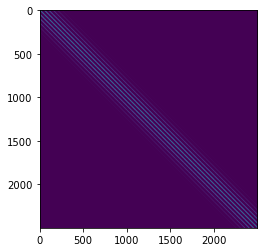

In [5]:
gc = GaussianCovariance(lc, sigma=1)
C = gc.build_correlation_matrix(x)
gc.visualise(C)

In [6]:
# matern = Matern(lc, nu=1/2)
# C = matern.build_correlation_matrix(x)
# matern.visualise(C)

### Build Gaussian distribution

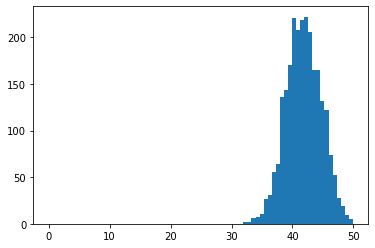

In [7]:
gaussian = Gaussian(mean_fc, std_dev)
md = MD(C, gaussian)
K = md.generate_sample()
plt.hist(K, 75, range=(0, np.max(K)));

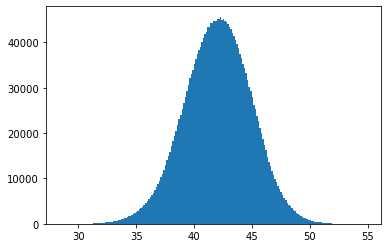

In [8]:
K_array = md.generate_samples(1000)
plt.hist(K_array.flatten(), 200);

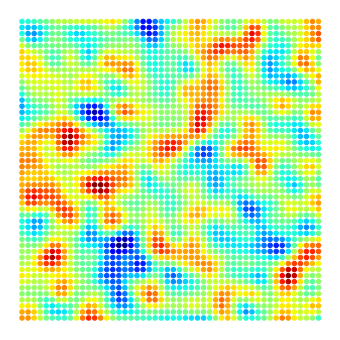

In [9]:
md.visualise(x, K, sz=20);

In [10]:
gaussian.print_distribution_properties(K)

Mean : 41.78
Standard deviation : 2.87


### Build log-normal distribution

Examine the Nataf transformation. The correlation matrix must be modified.

[Nataf transformation based point estimate method](https://link.springer.com/content/pdf/10.1007/s11434-008-0351-0.pdf)

In [11]:
def nataf_transformation(C, std_dev):
    return (np.exp(std_dev**2 * C) - 1) / (np.exp(std_dev) - 1)

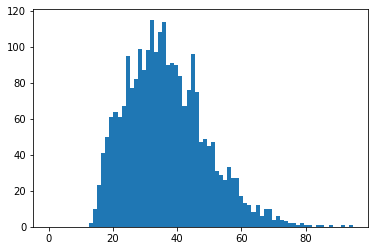

In [12]:
lognormal = LogNormal(mean_fc, 800)
md = MD(C, lognormal)
K = md.generate_sample()
plt.hist(K, 75, range=(0, np.max(K)));

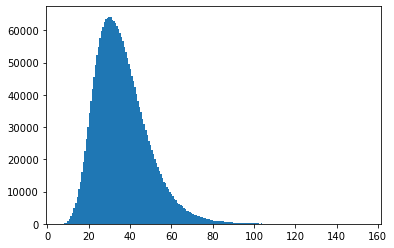

In [13]:
K_array = md.generate_samples(1000)
plt.hist(K_array.flatten(), 200);

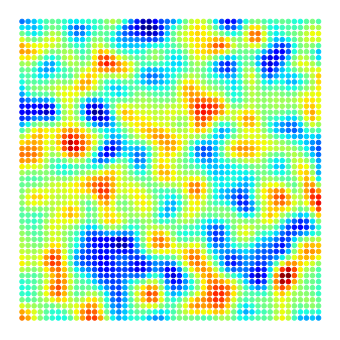

In [14]:
md.visualise(x, np.log(K), 20)

In [15]:
lognormal.print_distribution_properties(K)

Mean : 36.82
Standard deviation : 12.40


### Build Weibull distribution

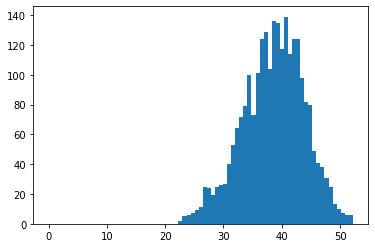

In [29]:
weibull = Weibull(mean_fc, std_dev, 5)
md = MD(C, weibull)
K = md.generate_sample()
plt.hist(K, 75, range=(0, np.max(K)));

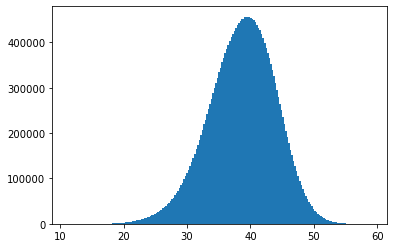

In [30]:
K_array = md.generate_samples(10000)
plt.hist(K_array.flatten(), 200);

### Build Weibull distribution - original

In [18]:
gaussian = Gaussian(mean_fc, std_dev)
md = MD(C, gaussian)
K = md.generate_sample() # sample of the random field

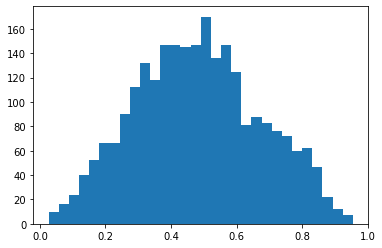

In [19]:
rv_norm = stats.norm.cdf(K, mean_fc, std_dev)
plt.hist(rv_norm, 30);

In the field of materials science, the shape parameter $k$ of a distribution of strengths is known as the Weibull modulus. The Weibull modulus is a dimensionless parameter of the Weibull distribution which is used to describe variability in measured material strength of brittle materials.

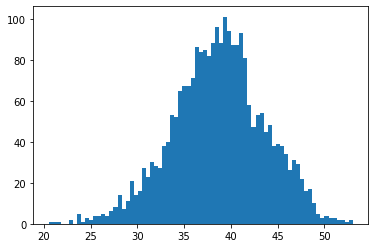

In [20]:
shape = 5
rv_weib = stats.weibull_min.ppf(rv_norm, shape, loc=0, scale=42.3)
plt.hist(rv_weib, 75);

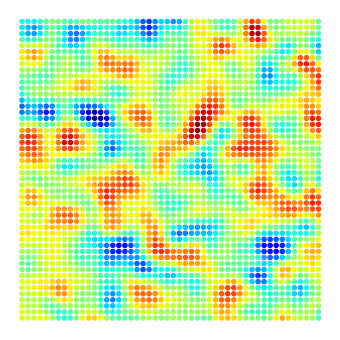

In [21]:
md.visualise(x, rv_weib, sz=20);